In [65]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [66]:
# import dataset
url="C:/Users/tim94/OneDrive/Dokumente/Universität Bern/Statistical Inference for Data Science/Project/SAR-100923.csv"
df_sar = pd.read_csv(url)
df_sar.head(100)

,regid,gender,anshside,asa,sgopdt,diagnosis,sgaplbrand,sgbasetype8,sgbaseperf8,sgglenosphpos,...,ssv0,cs0,abdkraft0,ssv24,cs24,abdkraft24,notching24,csc,abdkraftc,ssvc
0,SAR-00902,Weiblich,Rechts,2,2011-04-11,Fracture Sequelae,Aequalis reversed,Reversed II standard,NaN,exzentrisch,...,NaN,28.2,0.0,NaN,64.7,3.0,0,36.5,3.0,NaN
1,SAR-00927,Männlich,Links,3,2011-05-20,Fracture Sequelae,Aequalis reversed,Reversed II standard,NaN,exzentrisch,...,NaN,16.8,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN
2,SAR-01292,Weiblich,Rechts,3,2012-12-18,Fracture Sequelae,Aequalis reversed,Reversed II standard,NaN,zentrisch,...,NaN,13.9,0.0,NaN,NaN,5.5,0,NaN,5.5,NaN
3,SAR-01490,Weiblich,Rechts,2,2013-11-19,Primary Osteoarthritis,Aequalis reversed,Reversed II long post,NaN,zentrisch,...,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN
4,SAR-01530,Männlich,Rechts,3,2014-02-07,NaN,Aequalis reversed,Reversed II standard,NaN,exzentrisch,...,20.0,14.4,0.0,5.0,13.5,0.0,1,-0.9,0.0,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SAR-02454,Weiblich,Links,3,2017-10-27,Cuff Tear Arthropathy (CTA),Aequalis reversed,Reversed II standard,NaN,exzentrisch,...,30.0,16.5,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN
96,SAR-02458,Männlich,Links,2,2017-11-02,Fracture Sequelae,Aequalis reversed,Reversed II standard,NaN,exzentrisch,...,70.0,39.9,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN
97,SAR-02461,Weiblich,Links,3,2017-11-06,Cuff Tear Arthropathy (CTA),Aequalis reversed,Reversed II standard,NaN,exzentrisch,...,NaN,4.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN
98,SAR-02483,Männlich,Rechts,3,2017-11-24,Cuff Tear Arthropathy (CTA),Aequalis reversed,Reversed II standard,NaN,exzentrisch,...,50.0,32.1,0.0,85.0,83.9,9.0,0,51.8,9.0,35.0


In [67]:
#prepare datasets for hypothesis testing *Constant Score*

#drop all NaN
df_cs = df_sar[['csc', 'cs0', 'cs24', 'lateralized', 'gender', 'bmi', 'asa', 'diagnosis']]
df_cleaned_cs = df_cs.dropna()

#create two dfs for different groups
df_cleaned_cs_nolat = df_cleaned_cs[df_cleaned_cs['lateralized']==0]
df_cleaned_cs_lat = df_cleaned_cs[df_cleaned_cs['lateralized']==1]

df_cleaned_cs_nolat.head(100)
# df_cleaned_cs_lat.info()

#create df for subgroups
#gender
df_cleaned_cs_nolat_m = df_cleaned_cs_nolat[df_cleaned_cs_nolat['gender']=='Männlich']
df_cleaned_cs_nolat_f = df_cleaned_cs_nolat[df_cleaned_cs_nolat['gender']=='Weiblich']
df_cleaned_cs_lat_m = df_cleaned_cs_lat[df_cleaned_cs_lat['gender']=='Männlich']
df_cleaned_cs_lat_f = df_cleaned_cs_lat[df_cleaned_cs_lat['gender']=='Weiblich']

#bmi
df_cleaned_cs_nolat_25up = df_cleaned_cs_nolat[df_cleaned_cs_nolat['bmi']>=25]
df_cleaned_cs_nolat_20_25 = df_cleaned_cs_nolat[(df_cleaned_cs_nolat['bmi']<25) & (df_cleaned_cs_nolat['bmi']>=20)]
df_cleaned_cs_lat_25up = df_cleaned_cs_lat[df_cleaned_cs_lat['bmi']>=25]
df_cleaned_cs_lat_20_25 = df_cleaned_cs_lat[(df_cleaned_cs_lat['bmi']<25) & (df_cleaned_cs_lat['bmi']>=20)]

# df_cleaned_cs_nolat_20_25.head(100)

#asa
df_cleaned_cs_nolat_asa12 = df_cleaned_cs_nolat[df_cleaned_cs_nolat['asa']<=2]
df_cleaned_cs_nolat_asa34 = df_cleaned_cs_nolat[df_cleaned_cs_nolat['asa']>=3]
df_cleaned_cs_lat_asa12 = df_cleaned_cs_lat[df_cleaned_cs_lat['asa']<=2]
df_cleaned_cs_lat_asa34 = df_cleaned_cs_lat[df_cleaned_cs_lat['asa']>=3]

#diagnosis
df_cleaned_cs_nolat_OA = df_cleaned_cs_nolat[df_cleaned_cs_nolat['diagnosis']=='Primary Osteoarthritis']
df_cleaned_cs_nolat_CTA = df_cleaned_cs_nolat[df_cleaned_cs_nolat['diagnosis']=='Cuff Tear Arthropathy (CTA)']
df_cleaned_cs_lat_OA = df_cleaned_cs_lat[df_cleaned_cs_lat['diagnosis']=='Primary Osteoarthritis']
df_cleaned_cs_lat_CTA = df_cleaned_cs_lat[df_cleaned_cs_lat['diagnosis']=='Cuff Tear Arthropathy (CTA)']

# x = df_sar[['bmi']].dropna()
# df_sar['bmi'].plot(kind='hist')

In [68]:
#check for normality (d'agostino pearson)
 
print('p-values from the normality tests on the cs change (D Agostino-Pearson):')
datasets        = [df_cleaned_cs_nolat['csc'],df_cleaned_cs_lat['csc'],df_cleaned_cs_nolat_m['csc'],df_cleaned_cs_lat_m['csc'],
                   df_cleaned_cs_nolat_f['csc'],df_cleaned_cs_lat_f['csc'],df_cleaned_cs_nolat_25up['csc'],df_cleaned_cs_lat_25up['csc'],
                   df_cleaned_cs_nolat_20_25['csc'],df_cleaned_cs_lat_20_25['csc'],df_cleaned_cs_nolat_asa12['csc'],df_cleaned_cs_lat_asa12['csc'],
                   df_cleaned_cs_nolat_asa34['csc'],df_cleaned_cs_lat_asa34['csc'],df_cleaned_cs_nolat_OA['csc'],df_cleaned_cs_lat_OA['csc'],
                   df_cleaned_cs_nolat_CTA['csc'],df_cleaned_cs_lat_CTA['csc']]
dataset_labels  = ['Not lateralized: ','Lateralized: ','Not lateralized m: ','Lateralized m: ', 
                   'Not lateralized f: ','Lateralized f: ', 'Not lateralized BMI>25: ','Lateralized BMI>25: ',
                   'Not lateralized BMI<25: ', 'Lateralized BMI<25: ', 'Not lateralized ASA 1,2: ', 'Lateralized ASA 1,2: ',
                   'Not lateralized ASA 3,4: ', 'Lateralized ASA 3,4: ', 'Not lateralized OA: ', 'Lateralized OA: ',
                   'Not lateralized CTA: ', 'Lateralized CTA: ']
# i = 0
# for dataset in datasets:
#   k2, p = stats.normaltest(dataset) # D Agostino-Pearson
#   print('%10s %1.2f ' % (dataset_labels[i],p))
#   print(f'std: ',np.std(dataset))
#   print(" ")
#   i+=1

p-values from the normality tests on the cs change (D Agostino-Pearson):


###### male lat. vs male n.lat
normal distributed.
std. male lat 13.9
std. mal nlat 15.5
-> can assume equal variances -> unpaired t-test
###### bmi<25 lat vs bmi<25 n.lat
normal distributed.
std. BMI<25 lat 14.2
std. BMI<25 nlat 13.45
-> can assume equal variances -> unpaired t-test
###### asa1,2 lat vs asa1,2 n.lat
normal distributed.
std. asa1,2 lat 13.3
std. asa1,2 nlat 13.8
-> can assume equal variances -> unpaired t-test
###### lat vs n.lat overall
not normal distributed -> mann whitney u test
###### female lat vs female n.lat
not normal distributed -> mann withney u test
###### bmi>25 lat vs bmi>25 n.lat
not normal distributed -> mann whitney u test
###### asa3,4 lat vs asa3,4 n.lat
not normal distributed -> mann whitney u test
###### OA lat vs OA n.lat
not normal distributed -> mann whitney u test
###### CTA lat vs CTA n.lat
not normal distributed -> mann whitney u test

In [69]:
print('unpaired t-tests')
print(' ')
print('male lat. vs male n.lat')
x, pvalue=stats.ttest_ind(df_cleaned_cs_nolat_m['csc'],df_cleaned_cs_lat_m['csc'], equal_var = True, alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('mbmi<25 lat vs bmi<25 n.lat')
x, pvalue=stats.ttest_ind(df_cleaned_cs_nolat_20_25['csc'],df_cleaned_cs_lat_20_25['csc'], equal_var = True, alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('asa1,2 lat vs asa1,2 n.lat')
x, pvalue=stats.ttest_ind(df_cleaned_cs_nolat_asa12['csc'],df_cleaned_cs_lat_asa12['csc'], equal_var = True, alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

# print(df_cleaned_cs_lat_20_25['csc'].mean())

unpaired t-tests
 
male lat. vs male n.lat
P-Value :0.46540576200229655. Difference is not significant
 
mbmi<25 lat vs bmi<25 n.lat
P-Value :0.6050101191883797. Difference is not significant
 
asa1,2 lat vs asa1,2 n.lat
P-Value :0.9405620858132143. Difference is not significant
 


In [70]:
print('mann whitney u tests')
print(' ')
print('lat vs n.lat overall')
x, pvalue = stats.mannwhitneyu(df_cleaned_cs_lat['csc'],df_cleaned_cs_nolat['csc'], alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('female lat vs female n.lat')
x, pvalue = stats.mannwhitneyu(df_cleaned_cs_lat_f['csc'],df_cleaned_cs_nolat_f['csc'], alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('bmi>25 lat vs bmi>25 n.lat')
x, pvalue = stats.mannwhitneyu(df_cleaned_cs_lat_25up['csc'],df_cleaned_cs_nolat_25up['csc'], alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('asa3,4 lat vs asa3,4 n.lat')
x, pvalue = stats.mannwhitneyu(df_cleaned_cs_lat_asa34['csc'],df_cleaned_cs_nolat_asa34['csc'], alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('OA lat vs OA n.lat')
x, pvalue = stats.mannwhitneyu(df_cleaned_cs_lat_OA['csc'],df_cleaned_cs_nolat_OA['csc'], alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('CTA lat vs CTA n.lat')
x, pvalue = stats.mannwhitneyu(df_cleaned_cs_lat_CTA['csc'],df_cleaned_cs_nolat_CTA['csc'], alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

mann whitney u tests
 
lat vs n.lat overall
P-Value :0.8880378541711177. Difference is not significant
 
female lat vs female n.lat
P-Value :0.415659838426615. Difference is not significant
 
bmi>25 lat vs bmi>25 n.lat
P-Value :0.7726729444059239. Difference is not significant
 
asa3,4 lat vs asa3,4 n.lat
P-Value :0.7900208152406877. Difference is not significant
 
OA lat vs OA n.lat
P-Value :0.9078425114265368. Difference is not significant
 
CTA lat vs CTA n.lat
P-Value :0.8586409869404765. Difference is not significant
 


In [71]:
#look at ssv now.
#do baseline comparison of the groups as well
#maybe look at abd rom as well?

# plt.bar(['No Lateralization','Lateralization'],[df_cleaned_cs_lat['csc'].mean(),df_cleaned_cs_nolat['csc'].mean()], width=0.4)
# plt.title('CS change')
# plt.ylabel('Change in Score')

# plt.bar(['Lateralization','No Lateralization'],[df_cleaned_ssv_lat_f['ssvc'].mean(),df_cleaned_ssv_nolat['ssvc'].mean()], width=0.4)

In [72]:
#prepare datasets for hypothesis testing *SSV*

#drop all NaN
df_ssv = df_sar[['ssvc', 'ssv0', 'ssv24', 'lateralized', 'gender', 'bmi', 'asa', 'diagnosis']]
df_cleaned_ssv = df_ssv.dropna()

#create two dfs for different groups
df_cleaned_ssv_nolat = df_cleaned_ssv[df_cleaned_ssv['lateralized']==0]
df_cleaned_ssv_lat = df_cleaned_ssv[df_cleaned_ssv['lateralized']==1]

df_cleaned_cs_nolat.head(100)
# df_cleaned_cs_lat.info()

#create df for subgroups
#gender
df_cleaned_ssv_nolat_m = df_cleaned_ssv_nolat[df_cleaned_ssv_nolat['gender']=='Männlich']
df_cleaned_ssv_nolat_f = df_cleaned_ssv_nolat[df_cleaned_ssv_nolat['gender']=='Weiblich']
df_cleaned_ssv_lat_m = df_cleaned_ssv_lat[df_cleaned_ssv_lat['gender']=='Männlich']
df_cleaned_ssv_lat_f = df_cleaned_ssv_lat[df_cleaned_ssv_lat['gender']=='Weiblich']

#bmi
df_cleaned_ssv_nolat_25up = df_cleaned_ssv_nolat[df_cleaned_ssv_nolat['bmi']>=25]
df_cleaned_ssv_nolat_20_25 = df_cleaned_ssv_nolat[(df_cleaned_ssv_nolat['bmi']<25) & (df_cleaned_ssv_nolat['bmi']>=20)]
df_cleaned_ssv_lat_25up = df_cleaned_ssv_lat[df_cleaned_ssv_lat['bmi']>=25]
df_cleaned_ssv_lat_20_25 = df_cleaned_ssv_lat[(df_cleaned_ssv_lat['bmi']<25) & (df_cleaned_ssv_lat['bmi']>=20)]

# df_cleaned_cs_nolat_20_25.head(100)

#asa
df_cleaned_ssv_nolat_asa12 = df_cleaned_ssv_nolat[df_cleaned_ssv_nolat['asa']<=2]
df_cleaned_ssv_nolat_asa34 = df_cleaned_ssv_nolat[df_cleaned_ssv_nolat['asa']>=3]
df_cleaned_ssv_lat_asa12 = df_cleaned_ssv_lat[df_cleaned_ssv_lat['asa']<=2]
df_cleaned_ssv_lat_asa34 = df_cleaned_ssv_lat[df_cleaned_ssv_lat['asa']>=3]

#diagnosis
df_cleaned_ssv_nolat_OA = df_cleaned_ssv_nolat[df_cleaned_ssv_nolat['diagnosis']=='Primary Osteoarthritis']
df_cleaned_ssv_nolat_CTA = df_cleaned_ssv_nolat[df_cleaned_ssv_nolat['diagnosis']=='Cuff Tear Arthropathy (CTA)']
df_cleaned_ssv_lat_OA = df_cleaned_ssv_lat[df_cleaned_ssv_lat['diagnosis']=='Primary Osteoarthritis']
df_cleaned_ssv_lat_CTA = df_cleaned_ssv_lat[df_cleaned_ssv_lat['diagnosis']=='Cuff Tear Arthropathy (CTA)']

In [73]:
#check for normality (d'agostino pearson)
 
print('p-values from the normality tests on the ssv change (D Agostino-Pearson):')
datasets        = [df_cleaned_ssv_nolat['ssvc'],df_cleaned_ssv_lat['ssvc'],df_cleaned_ssv_nolat_m['ssvc'],df_cleaned_ssv_lat_m['ssvc'],
                   df_cleaned_ssv_nolat_f['ssvc'],df_cleaned_ssv_lat_f['ssvc'],df_cleaned_ssv_nolat_25up['ssvc'],df_cleaned_ssv_lat_25up['ssvc'],
                   df_cleaned_ssv_nolat_20_25['ssvc'],df_cleaned_ssv_lat_20_25['ssvc'],df_cleaned_ssv_nolat_asa12['ssvc'],df_cleaned_ssv_lat_asa12['ssvc'],
                   df_cleaned_ssv_nolat_asa34['ssvc'],df_cleaned_ssv_lat_asa34['ssvc'],df_cleaned_ssv_nolat_OA['ssvc'],df_cleaned_ssv_lat_OA['ssvc'],
                   df_cleaned_ssv_nolat_CTA['ssvc'],df_cleaned_ssv_lat_CTA['ssvc']]
dataset_labels  = ['Not lateralized: ','Lateralized: ','Not lateralized m: ','Lateralized m: ', 
                   'Not lateralized f: ','Lateralized f: ', 'Not lateralized BMI>25: ','Lateralized BMI>25: ',
                   'Not lateralized BMI<25: ', 'Lateralized BMI<25: ', 'Not lateralized ASA 1,2: ', 'Lateralized ASA 1,2: ',
                   'Not lateralized ASA 3,4: ', 'Lateralized ASA 3,4: ', 'Not lateralized OA: ', 'Lateralized OA: ',
                   'Not lateralized CTA: ', 'Lateralized CTA: ']
# i = 0
# for dataset in datasets:
#   k2, p = stats.normaltest(dataset) # D Agostino-Pearson
#   print('%10s %1.2f ' % (dataset_labels[i],p))
#   print(f'std: ',np.std(dataset))
#   print(" ")
#   i+=1

p-values from the normality tests on the ssv change (D Agostino-Pearson):


###### male lat. vs male n.lat
normal distributed. std. male lat 23.6 std. mal nlat 22.7 -> can assume equal variances -> unpaired t-test
###### bmi<25 lat vs bmi<25 n.lat
normal distributed. std. BMI<25 lat 23.0 std. BMI<25 nlat 25.2 -> can assume equal variances? -> unpaired t-test with correction?
###### asa3,4 lat vs asa3,4 n.lat
normal distributed. std. asa3,4 lat 26.6 std. asa3,4 nlat 24.0 -> can assume equal variances? -> unpaired t-test with correction???
###### lat vs n.lat overall
not normal distributed -> mann whitney u test
###### asa1,2 lat vs asa1,2 n.lat
not normal distributed -> mann whitney u test
###### female lat vs female n.lat
not normal distributed -> mann whitney u test
###### bmi>25 lat vs bmi>25 n.lat
not normal distributed -> mann whitney u test
###### OA lat vs OA n.lat
not normal distributed -> mann whitney u test
###### CTA lat vs CTA n.lat
not normal distributed -> mann whitney u test

In [74]:
print('unpaired t-tests')
print(' ')
print('male lat. vs male n.lat')
x, pvalue=stats.ttest_ind(df_cleaned_ssv_nolat_m['ssvc'],df_cleaned_ssv_lat_m['ssvc'], equal_var = True, alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('bmi<25 lat vs bmi<25 n.lat')
x, pvalue=stats.ttest_ind(df_cleaned_ssv_nolat_20_25['ssvc'],df_cleaned_ssv_lat_20_25['ssvc'], equal_var = True, alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('asa3,4 lat vs asa3,4 n.lat')
x, pvalue=stats.ttest_ind(df_cleaned_ssv_nolat_asa34['ssvc'],df_cleaned_ssv_lat_asa34['ssvc'], equal_var = True, alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

# plt.bar(['a','b'],[df_cleaned_ssv_nolat_asa34['ssvc'].mean(),df_cleaned_ssv_lat_asa34['ssvc'].mean()], width=0.4)

unpaired t-tests
 
male lat. vs male n.lat
P-Value :0.930382966694012. Difference is not significant
 
bmi<25 lat vs bmi<25 n.lat
P-Value :0.9556221754109289. Difference is not significant
 
asa3,4 lat vs asa3,4 n.lat
P-Value :0.1649608235916506. Difference is not significant
 


In [75]:
print('mann whitney u tests')
print(' ')
print('lat vs n.lat overall')
x, pvalue = stats.mannwhitneyu(df_cleaned_ssv_lat['ssvc'],df_cleaned_ssv_nolat['ssvc'], alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('asa1,2 lat vs asa1,2 n.lat')
x, pvalue = stats.mannwhitneyu(df_cleaned_ssv_lat_asa12['ssvc'],df_cleaned_ssv_nolat_asa12['ssvc'], alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('female lat vs female n.lat')
x, pvalue = stats.mannwhitneyu(df_cleaned_ssv_lat_f['ssvc'],df_cleaned_ssv_nolat_f['ssvc'], alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('bmi>25 lat vs bmi>25 n.lat')
x, pvalue = stats.mannwhitneyu(df_cleaned_ssv_lat_25up['ssvc'],df_cleaned_ssv_nolat_25up['ssvc'], alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('OA lat vs OA n.lat')
x, pvalue = stats.mannwhitneyu(df_cleaned_ssv_lat_OA['ssvc'],df_cleaned_ssv_nolat_OA['ssvc'], alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

print('CTA lat vs CTA n.lat')
x, pvalue = stats.mannwhitneyu(df_cleaned_ssv_lat_CTA['ssvc'],df_cleaned_ssv_nolat_CTA['ssvc'], alternative='two-sided')
if pvalue<0.05:
    print(f'P-Value :{pvalue}. Difference is significant')
else: 
    print(f'P-Value :{pvalue}. Difference is not significant')
print(' ')

mann whitney u tests
 
lat vs n.lat overall
P-Value :0.9278739315052547. Difference is not significant
 
asa1,2 lat vs asa1,2 n.lat
P-Value :0.2761501723970988. Difference is not significant
 
female lat vs female n.lat
P-Value :0.9765247015920586. Difference is not significant
 
bmi>25 lat vs bmi>25 n.lat
P-Value :0.9368903097914038. Difference is not significant
 
OA lat vs OA n.lat
P-Value :0.4703460601891398. Difference is not significant
 
CTA lat vs CTA n.lat
P-Value :0.6455418026779188. Difference is not significant
 


In [76]:
#prepare datasets for hypothesis testing *notching*

#drop all NaN
df_notching = df_sar[['notching24', 'lateralized', 'gender', 'bmi', 'asa', 'diagnosis']]
df_cleaned_notching = df_notching.dropna()

#create two dfs for different groups
df_cleaned_notching_nolat = df_cleaned_notching[df_cleaned_notching['lateralized']==0]
df_cleaned_notching_lat = df_cleaned_notching[df_cleaned_notching['lateralized']==1]

# df_cleaned_notching4_nolat = df_cleaned_notching[(df_cleaned_notching['lateralized']==0) & (df_cleaned_notching['notching24']==4)]
# df_cleaned_notching4_lat = df_cleaned_notching[(df_cleaned_notching['lateralized']==1) & (df_cleaned_notching['notching24']==4)]

#create df for subgroups
#gender
df_cleaned_notching_nolat_m = df_cleaned_notching_nolat[df_cleaned_notching_nolat['gender']=='Männlich']
df_cleaned_notching_nolat_f = df_cleaned_notching_nolat[df_cleaned_notching_nolat['gender']=='Weiblich']
df_cleaned_notching_lat_m = df_cleaned_notching_lat[df_cleaned_notching_lat['gender']=='Männlich']
df_cleaned_notching_lat_f = df_cleaned_notching_lat[df_cleaned_notching_lat['gender']=='Weiblich']

#bmi
df_cleaned_notching_nolat_25up = df_cleaned_notching_nolat[df_cleaned_notching_nolat['bmi']>=25]
df_cleaned_notching_nolat_20_25 = df_cleaned_notching_nolat[(df_cleaned_notching_nolat['bmi']<25) & (df_cleaned_notching_nolat['bmi']>=20)]
df_cleaned_notching_lat_25up = df_cleaned_notching_lat[df_cleaned_notching_lat['bmi']>=25]
df_cleaned_notching_lat_20_25 = df_cleaned_notching_lat[(df_cleaned_notching_lat['bmi']<25) & (df_cleaned_notching_lat['bmi']>=20)]

#asa
df_cleaned_notching_nolat_asa12 = df_cleaned_notching_nolat[df_cleaned_notching_nolat['asa']<=2]
df_cleaned_notching_nolat_asa34 = df_cleaned_notching_nolat[df_cleaned_notching_nolat['asa']>=3]
df_cleaned_notching_lat_asa12 = df_cleaned_notching_lat[df_cleaned_notching_lat['asa']<=2]
df_cleaned_notching_lat_asa34 = df_cleaned_notching_lat[df_cleaned_notching_lat['asa']>=3]

#diagnosis
df_cleaned_notching_nolat_OA = df_cleaned_notching_nolat[df_cleaned_notching_nolat['diagnosis']=='Primary Osteoarthritis']
df_cleaned_notching_nolat_CTA = df_cleaned_notching_nolat[df_cleaned_notching_nolat['diagnosis']=='Cuff Tear Arthropathy (CTA)']
df_cleaned_notching_lat_OA = df_cleaned_notching_lat[df_cleaned_notching_lat['diagnosis']=='Primary Osteoarthritis']
df_cleaned_notching_lat_CTA = df_cleaned_notching_lat[df_cleaned_notching_lat['diagnosis']=='Cuff Tear Arthropathy (CTA)']


In [77]:
a = (df_cleaned_notching_lat['notching24'] > 0 ).sum()
print(a)
b = (df_cleaned_notching_lat['notching24'] == 0 ).sum()
print(b)
c = (df_cleaned_notching_nolat['notching24'] > 0 ).sum()
print(c)
d = (df_cleaned_notching_nolat['notching24'] == 0 ).sum()
print(d)

#                   Notched    Not Notched    Total
# Lateralized        a 12          b 126      a + b 138
# Classic            c 46          d 312      c + d 358
# Total              a + c 58      b + d 438  n 496 

12
126
46
312


###### categorical data -> chi squared test

In [78]:
from scipy.stats import chi2_contingency

# Create a contingency table
observed = np.array([[a, b], [c, d]])

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(observed)

# Print the results
# print(f"Chi-squared statistic: {chi2}")
# print(f"P-value: {p}")
# print(f"Degrees of freedom: {dof}")
# print("Expected frequencies:")
# print(expected)

if p<0.05:
    print(f'P-Value :{p}. Difference is significant')
else: 
    print(f'P-Value :{p}. Difference is not significant')

P-Value :0.25675927108298807. Difference is not significant


In [79]:
# grouped_notching = df_notching.groupby('lateralized').mean()
# grouped_notching['notching24'].plot(kind='bar')

# fig= df_cleaned_notching_lat['notching24'].plot(kind='hist', histtype='step')
# df_cleaned_notching_nolat['notching24'].plot(kind='hist', histtype='step')

{'Severity of Notching': ['0', '1', '2', '4', '0', '1', '2', '4'], 'Lateralized': ['Classic', 'Classic', 'Classic', 'Classic', 'Lateralized', 'Lateralized', 'Lateralized', 'Lateralized'], 'Count': [312, 36, 9, 1, 126, 9, 3, 0]}


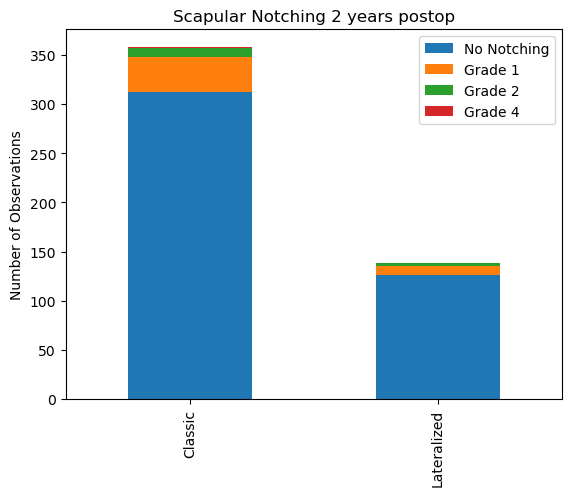

In [80]:
# Create a DataFrame from the notching data
data = {
    'Severity of Notching': ['0','1', '2', '4', '0','1', '2', '4'],
    'Lateralized': ['Classic','Classic','Classic','Classic','Lateralized','Lateralized','Lateralized','Lateralized'],
    'Count': [((df_cleaned_notching['notching24'] == 0) & (df_cleaned_notching['lateralized'] == 0)).sum(),
              ((df_cleaned_notching['notching24'] == 1) & (df_cleaned_notching['lateralized'] == 0)).sum(), 
              ((df_cleaned_notching['notching24'] == 2) & (df_cleaned_notching['lateralized'] == 0)).sum(), 
              ((df_cleaned_notching['notching24'] == 4) & (df_cleaned_notching['lateralized'] == 0)).sum(),
              ((df_cleaned_notching['notching24'] == 0) & (df_cleaned_notching['lateralized'] == 1)).sum(),
              ((df_cleaned_notching['notching24'] == 1) & (df_cleaned_notching['lateralized'] == 1)).sum(),
              ((df_cleaned_notching['notching24'] == 2) & (df_cleaned_notching['lateralized'] == 1)).sum(),
              ((df_cleaned_notching['notching24'] == 4) & (df_cleaned_notching['lateralized'] == 1)).sum()
             ]
    }
# df_cleaned_notching['notching24'].unique()
print(data)
df = pd.DataFrame(data)

# # # Pivot the DataFrame to get it in the right format for a stacked bar plot
pivot_df = df.pivot(index='Lateralized', columns='Severity of Notching', values='Count')

# # # Plotting
ax=pivot_df.plot(kind='bar', stacked=True)

# # # Adding labels and title
plt.xlabel('')
plt.ylabel('Number of Observations')
plt.title('Scapular Notching 2 years postop')

colors = ['#FF5733', '#33FF57', '#3357FF']  # Example colors
legend_labels = ['No Notching', 'Grade 1', 'Grade 2', 'Grade 4']
ax.legend(legend_labels, loc='best')
# # # Show the plot
plt.show()

{'Severity of Notching': ['1', '2', '4', '1', '2', '4'], 'Lateralized': ['Classic', 'Classic', 'Classic', 'Lateralized', 'Lateralized', 'Lateralized'], 'Count': [36, 9, 1, 9, 3, 0]}


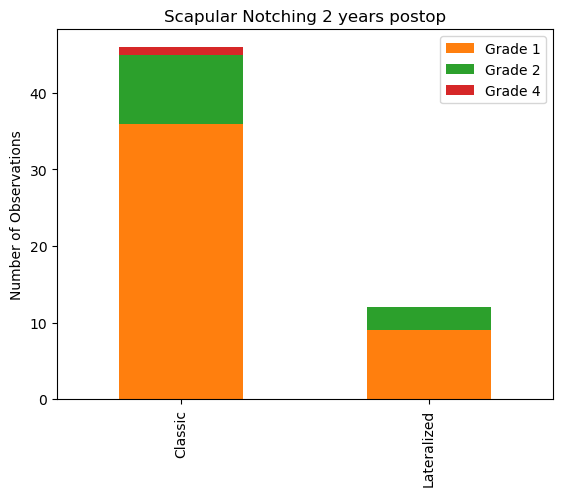

In [81]:
# Create a DataFrame from the notching data
data = {
    'Severity of Notching': ['1', '2', '4','1', '2', '4'],
    'Lateralized': ['Classic','Classic','Classic','Lateralized','Lateralized','Lateralized'],
    'Count': [((df_cleaned_notching['notching24'] == 1) & (df_cleaned_notching['lateralized'] == 0)).sum(), 
              ((df_cleaned_notching['notching24'] == 2) & (df_cleaned_notching['lateralized'] == 0)).sum(), 
              ((df_cleaned_notching['notching24'] == 4) & (df_cleaned_notching['lateralized'] == 0)).sum(),
              ((df_cleaned_notching['notching24'] == 1) & (df_cleaned_notching['lateralized'] == 1)).sum(),
              ((df_cleaned_notching['notching24'] == 2) & (df_cleaned_notching['lateralized'] == 1)).sum(),
              ((df_cleaned_notching['notching24'] == 4) & (df_cleaned_notching['lateralized'] == 1)).sum()
             ]
    }
# df_cleaned_notching['notching24'].unique()
print(data)
df = pd.DataFrame(data)

# # # Pivot the DataFrame to get it in the right format for a stacked bar plot
pivot_df = df.pivot(index='Lateralized', columns='Severity of Notching', values='Count')

# # # Plotting
colors = ['#FF7F0E','#2CA02C','#D62728']  # Example colors
ax=pivot_df.plot(kind='bar', stacked=True, color=colors)
# ax=pivot_df.plot(kind='bar', stacked=True)

# # # Adding labels and title
plt.xlabel('')
plt.ylabel('Number of Observations')
plt.title('Scapular Notching 2 years postop')


legend_labels = ['Grade 1', 'Grade 2', 'Grade 4']
ax.legend(legend_labels, loc='best')
# # # Show the plot
plt.show()

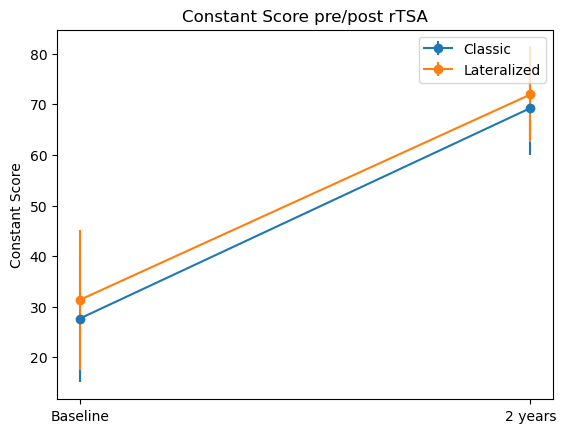

In [82]:
time_points = ['Baseline', '2 years']
values = [df_cleaned_cs_nolat['cs0'].mean(), df_cleaned_cs_nolat['cs24'].mean()]
std_devs = [np.std(df_cleaned_cs_nolat['cs0']), np.std(df_cleaned_cs_nolat['cs24'])]
valueslat = [df_cleaned_cs_lat['cs0'].mean(), df_cleaned_cs_lat['cs24'].mean()]
std_devslat = [np.std(df_cleaned_cs_lat['cs0']), np.std(df_cleaned_cs_lat['cs24'])]
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data points
ax.errorbar(time_points, values, yerr=std_devs, fmt='o-', label='Classic')
ax.errorbar(time_points, valueslat, yerr=std_devslat, fmt='o-', label='Lateralized')

# Add labels and title
plt.xlabel('')
plt.ylabel('Constant Score')
plt.title('Constant Score pre/post rTSA')

# Add legend
plt.legend()

# Show the plot
plt.show()

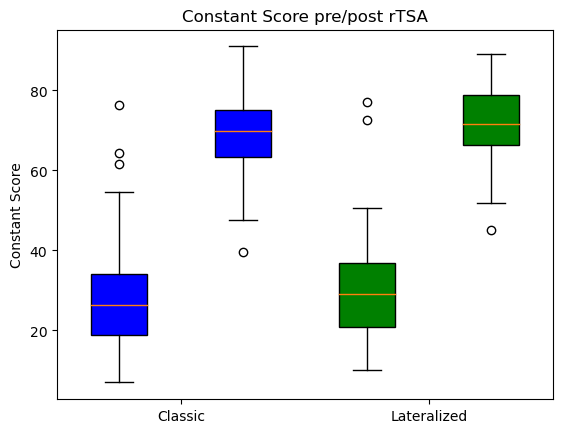

In [83]:
# Extract the data from the DataFrames
data1 = df_cleaned_cs_nolat['cs0'].tolist()
data2 = df_cleaned_cs_nolat['cs24'].tolist()
data3 = df_cleaned_cs_lat['cs0'].tolist()
data4 = df_cleaned_cs_lat['cs24'].tolist()

# Create a list of data for boxplot
data = [data1, data2, data3, data4]

boxes = plt.boxplot(data, patch_artist=True)
box_colors = ['blue', 'blue', 'green', 'green']
# Set custom colors for the boxes
for box, color in zip(boxes['boxes'], box_colors):
    box.set(facecolor=color)
    
# Add x-axis labels
plt.xticks([1.5, 3.5], ['Classic', 'Lateralized'])

# Add labels and title
plt.xlabel('')
plt.ylabel('Constant Score')
plt.title('Constant Score pre/post rTSA')
# plt.legend(boxes['boxes'], ['Group 1', 'Group 2'], loc='best')
# Show the plot
plt.show()

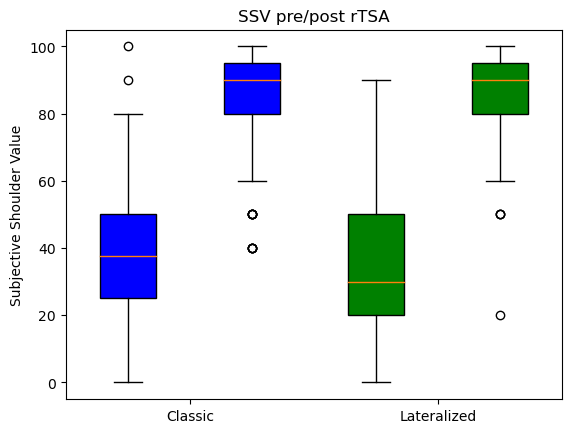

In [84]:
# Extract the data from the DataFrames
data1 = df_cleaned_ssv_nolat['ssv0'].tolist()
data2 = df_cleaned_ssv_nolat['ssv24'].tolist()
data3 = df_cleaned_ssv_lat['ssv0'].tolist()
data4 = df_cleaned_ssv_lat['ssv24'].tolist()

# Create a list of data for boxplot
data = [data1, data2, data3, data4]

boxes = plt.boxplot(data, patch_artist=True)
box_colors = ['blue', 'blue', 'green', 'green']
# Set custom colors for the boxes
for box, color in zip(boxes['boxes'], box_colors):
    box.set(facecolor=color)
    
# Add x-axis labels
plt.xticks([1.5, 3.5], ['Classic', 'Lateralized'])

# Add labels and title
plt.xlabel('')
plt.ylabel('Subjective Shoulder Value')
plt.title('SSV pre/post rTSA')
# plt.legend(boxes['boxes'], ['Group 1', 'Group 2'], loc='best')
# Show the plot
plt.show()

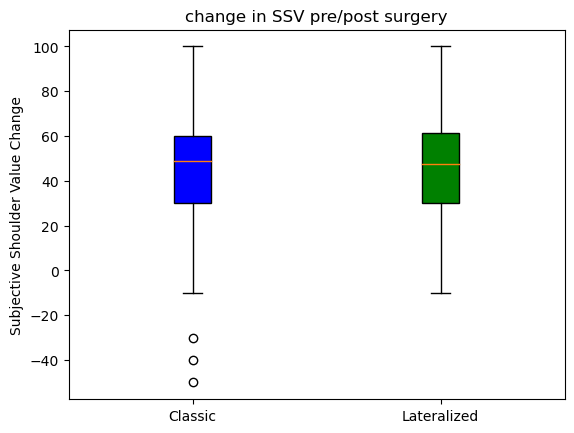

In [85]:
# Extract the data from the DataFrames
data1 = df_cleaned_ssv_nolat['ssvc'].tolist()
data2 = df_cleaned_ssv_lat['ssvc'].tolist()

# Create a list of data for boxplot
data = [data1, data2]

boxes = plt.boxplot(data, patch_artist=True)
box_colors = ['blue', 'green']
# Set custom colors for the boxes
for box, color in zip(boxes['boxes'], box_colors):
    box.set(facecolor=color)
    
# Add x-axis labels
plt.xticks([1, 2], ['Classic', 'Lateralized'])

# Add labels and title
plt.xlabel('')
plt.ylabel('Subjective Shoulder Value Change')
plt.title('change in SSV pre/post surgery')
# plt.legend(boxes['boxes'], ['Group 1', 'Group 2'], loc='best')
# Show the plot
plt.show()

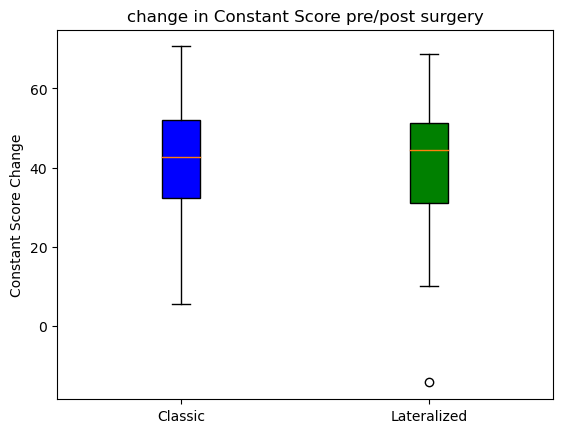

In [86]:
# Extract the data from the DataFrames
data1 = df_cleaned_cs_nolat['csc'].tolist()
data2 = df_cleaned_cs_lat['csc'].tolist()

# Create a list of data for boxplot
data = [data1, data2]

boxes = plt.boxplot(data, patch_artist=True)
box_colors = ['blue', 'green']
# Set custom colors for the boxes
for box, color in zip(boxes['boxes'], box_colors):
    box.set(facecolor=color)
    
# Add x-axis labels
plt.xticks([1, 2], ['Classic', 'Lateralized'])

# Add labels and title
plt.xlabel('')
plt.ylabel('Constant Score Change')
plt.title('change in Constant Score pre/post surgery')
# plt.legend(boxes['boxes'], ['Group 1', 'Group 2'], loc='best')
# Show the plot
plt.show()

In [87]:
df_demo = df_sar[['lateralized', 'gender', 'bmi', 'asa', 'diagnosis', 'Age', 'sgopdt']]
df_demo_lat = df_demo[df_demo['lateralized']==1]
df_demo_nolat = df_demo[df_demo['lateralized']==0]
# df_cleaned_demographics = df_demographics.dropna()
summary_stats_nolat = df_demo_nolat.describe(include='all')
print(summary_stats_nolat)
# df_demo['diagnosis'].unique()
df_demo_nolat['asa'].value_counts()

        lateralized    gender         bmi         asa  \
count         402.0       402  383.000000  402.000000   
unique          NaN         2         NaN         NaN   
top             NaN  Weiblich         NaN         NaN   
freq            NaN       251         NaN         NaN   
mean            0.0       NaN   27.233943    2.455224   
std             0.0       NaN    4.980454    0.550887   
min             0.0       NaN   17.500000    1.000000   
25%             0.0       NaN   23.600000    2.000000   
50%             0.0       NaN   26.700000    2.000000   
75%             0.0       NaN   29.700000    3.000000   
max             0.0       NaN   44.100000    4.000000   

                          diagnosis         Age      sgopdt  
count                           376  402.000000         402  
unique                            8         NaN         357  
top     Cuff Tear Arthropathy (CTA)         NaN  2023-02-27  
freq                            203         NaN           3  
mean 

2    209
3    182
1      7
4      4
Name: asa, dtype: int64

In [88]:
# df_demographics[df_demographics['lateralized']==1].sum()

In [89]:
summary_stats_lat = df_demo_lat.describe(include='all')
print(summary_stats_lat)
# df_demo_lat['Age'].median()
df_demo_lat['asa'].value_counts()

        lateralized    gender         bmi         asa  \
count         153.0       153  152.000000  153.000000   
unique          NaN         2         NaN         NaN   
top             NaN  Weiblich         NaN         NaN   
freq            NaN        89         NaN         NaN   
mean            1.0       NaN   26.828289    2.379085   
std             0.0       NaN    4.992530    0.550198   
min             1.0       NaN   17.400000    1.000000   
25%             1.0       NaN   23.350000    2.000000   
50%             1.0       NaN   26.050000    2.000000   
75%             1.0       NaN   28.825000    3.000000   
max             1.0       NaN   42.200000    4.000000   

                          diagnosis         Age      sgopdt  
count                           139  153.000000         153  
unique                            5         NaN         141  
top     Cuff Tear Arthropathy (CTA)         NaN  2019-10-30  
freq                             78         NaN           2  
mean 

2    88
3    60
1     4
4     1
Name: asa, dtype: int64

In [90]:
data = {
    'Age': [25, 30, 35, 40, 45],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Income': [50000, 60000, 70000, 80000, 90000],
    'Education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor']
}

df = pd.DataFrame(data)

# Display the table
print(df)

# Calculate summary statistics
summary_stats = df.describe(include='all')

# Print the summary statistics
print(summary_stats)

   Age  Gender  Income    Education
0   25    Male   50000  High School
1   30  Female   60000     Bachelor
2   35    Male   70000       Master
3   40  Female   80000          PhD
4   45    Male   90000     Bachelor
              Age Gender        Income Education
count    5.000000      5      5.000000         5
unique        NaN      2           NaN         4
top           NaN   Male           NaN  Bachelor
freq          NaN      3           NaN         2
mean    35.000000    NaN  70000.000000       NaN
std      7.905694    NaN  15811.388301       NaN
min     25.000000    NaN  50000.000000       NaN
25%     30.000000    NaN  60000.000000       NaN
50%     35.000000    NaN  70000.000000       NaN
75%     40.000000    NaN  80000.000000       NaN
max     45.000000    NaN  90000.000000       NaN


KeyError: 0

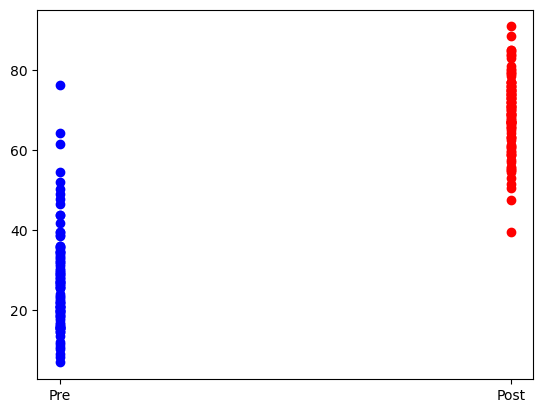

In [137]:
pre_data = {
    'y': df_cleaned_cs_nolat['cs0'],
    'x': ['Pre']*len(pre_data['y'])
}
# pre_data['x']
# len('y[,:]')
# pre_data
post_data = {
    'y': df_cleaned_cs_nolat['cs24'],
    'x': ['Post']*len(post_data['y'])
}

pre_y = df_cleaned_cs_nolat['cs0']
pre_x = ['Pre']*len(pre_y)
# pre_x = [1, 2, 3, 4, 5]
# pre_y = [2, 3, 5, 7, 11]
post_y = df_cleaned_cs_nolat['cs24']
post_x = ['Post']*len(pre_y)
# post_x = [1, 2, 3, 4, 5]
# post_y = [3, 4, 6, 8, 12]


# Create scatter plots for "pre" and "post"
plt.scatter(pre_x, pre_y, color='blue', label='Pre')
plt.scatter(post_x, post_y, color='red', label='Post')

# # Connect points with lines
# plt.plot(pre_x, pre_y, color='blue', linestyle='--')
# plt.plot(post_x, post_y, color='red', linestyle='--')

for i in range(len(pre_x)):
    plt.plot([pre_x[i], post_x[i]], [pre_y[i], post_y[i]], color='green')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Lines (Pre vs. Post)')

# Add legend
plt.legend()

# Show the plot
plt.show()

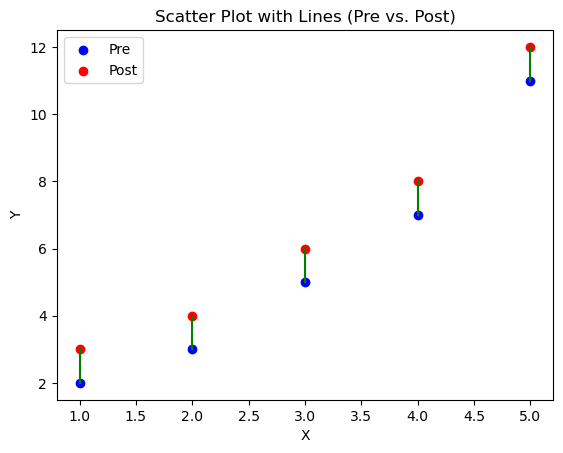

In [138]:
# Sample data for "pre" and "post"
pre_x = [1, 2, 3, 4, 5]
pre_y = [2, 3, 5, 7, 11]

post_x = [1, 2, 3, 4, 5]
post_y = [3, 4, 6, 8, 12]

# Create scatter plots for "pre" and "post"
plt.scatter(pre_x, pre_y, color='blue', label='Pre')
plt.scatter(post_x, post_y, color='red', label='Post')

# Connect points with lines
for i in range(len(pre_x)):
    plt.plot([pre_x[i], post_x[i]], [pre_y[i], post_y[i]], color='green')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Lines (Pre vs. Post)')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [39]:
# # cs change

# #histogram cs change
# fig=df_cleaned_nolat['csc'].plot(kind='hist', color='b')
# # fig=df_cleaned_lat['csc'].plot(kind='hist', color='g', bins=10)
# print(np.std(df_cleaned_nolat['csc']))
# print(np.std(df_cleaned_lat['csc']))
# np.std(df_cleaned_lat['csc'])/np.std(df_cleaned_nolat['csc'])
# sm.qqplot(df_cleaned_nolat['csc'], line='s')
# sm.qqplot(df_cleaned_lat['csc'], line='s')

# # quantitative test for normality (d'agostino pearson)
# print('p-values from the normality tests on the cs change (D Agostino-Pearson):')
# datasets        = [df_cleaned_nolat['csc'],df_cleaned_lat['csc'],df_cleaned_nolat_m['csc'],df_cleaned_lat_m['csc'],df_cleaned_nolat_f['csc'],df_cleaned_lat_f['csc']]
# dataset_labels  = ['Not lateralized','Lateralized','Not lateralized m','Lateralized m', 'Not lateralized f','Lateralized f']
# i = 0
# for dataset in datasets:
#   k2, p = stats.normaltest(dataset) # D Agostino-Pearson
#   print('%10s %1.2f ' % (dataset_labels[i],p))
#   i+=1

#2 samples with unequal variances and not normally distributed -> mann whitney u test

In [36]:
# abdkraft change

#histogram cs change
# fig=df_cleaned_nolat['abdkraftc'].plot(kind='hist', color='b')
# # fig=df_cleaned_lat['csc'].plot(kind='hist', color='g', bins=10)
# print(np.std(df_cleaned_nolat['abdkraftc']))
# print(np.std(df_cleaned_lat['abdkraftc']))
# np.std(df_cleaned_lat['abdkraftc'])/np.std(df_cleaned_nolat['csc'])
# sm.qqplot(df_cleaned_nolat['abdkraftc'], line='s')
# sm.qqplot(df_cleaned_lat['abdkraftc'], line='s')

# # quantitative test for normality (d'agostino pearson)
# print('p-values from the normality tests on the cs change (D Agostino-Pearson):')
# datasets        = [df_cleaned_nolat['abdkraftc'],df_cleaned_lat['abdkraftc'],df_cleaned_nolat_m['abdkraftc'],df_cleaned_lat_m['abdkraftc'],df_cleaned_nolat_f['abdkraftc'],df_cleaned_lat_f['abdkraftc']]
# dataset_labels  = ['Not lateralized','Lateralized','Not lateralized m','Lateralized m', 'Not lateralized f','Lateralized f']
# i = 0
# for dataset in datasets:
#   k2, p = stats.normaltest(dataset) # D Agostino-Pearson
#   print('%10s %1.2f ' % (dataset_labels[i],p))
#   i+=1

#2 samples with equal variances and normally distributed -> unpaired t-test

In [37]:
# df_cscmean = df_cleaned_nolat['csc'].mean()
# df_cscmeanlat = df_cleaned_lat['csc'].mean()


# unpaired ttest equal variances

# x, pvalue=stats.ttest_ind(df_cleaned_nolat['csc'],df_cleaned_lat['csc'], equal_var = True, alternative='two-sided')
# x, pvalue=stats.ttest_ind(df_cleaned_nolat_f['csc'],df_cleaned_lat_f['csc'], equal_var = True, alternative='two-sided')
# x, pvalue=stats.ttest_ind(df_cleaned_nolat_m['csc'],df_cleaned_lat_m['csc'], equal_var = True, alternative='two-sided')

# if pvalue<0.05:
#     print(f'P-Value :{pvalue}. Difference is significant')
# else: 
#     print(f'P-Value :{pvalue}. Difference is not significant')

# plt.bar(['No Lateralization','Lateralization'],[df_cscmean, df_cscmeanlat], width=0.4)
# plt.title('Constant Score change')
# plt.ylabel('Constant Score')
# help (plt.bar)

# scatterplot with lines/lineplot of pre post surgery "verlauf"

In [38]:
# df_abdkrmean = df_cleaned_nolat['abdkraftc'].mean()
# df_abdkrmeanlat = df_cleaned_lat['abdkraftc'].mean()

# x, pvalue=stats.ttest_ind(df_cleaned_nolat['abdkraftc'],df_cleaned_lat['abdkraftc'], equal_var = True, alternative='two-sided')
# x, pvalue=stats.ttest_ind(df_cleaned_nolat_f['abdkraftc'],df_cleaned_lat_f['abdkraftc'], equal_var = True, alternative='two-sided')
# x, pvalue=stats.ttest_ind(df_cleaned_nolat_m['abdkraftc'],df_cleaned_lat_m['abdkraftc'], equal_var = True, alternative='two-sided')

# if pvalue<0.05:
#     print(f'P-Value :{pvalue}. Difference is significant')
# else: 
#     print(f'P-Value :{pvalue}. Difference is not significant')
    
# plt.bar(['No Lateralization','Lateralization'],[df_abdkrmean, df_abdkrmeanlat], width=0.4)
# plt.title('Abduction strength change')
# plt.ylabel('Strength [kg]')
# help (plt.bar)

# scatterplot with lines/lineplot of pre post surgery "verlauf"

# no significant diff in cs and abdstrenght between lateralized groups, neither in total, in men nor in women. 
# not able to test for normality with dagostino pearson due to small sample size in df_cleaned_nolat_m. qqplot, hist? 
# filter by ASA or BMI, maybe there are differences explained by that? 